# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import data

ex_rates = pd.read_csv('exch_rates.csv')
ex_rates.Frequency = pd.to_datetime(ex_rates.Frequency)
ex_rates.set_index('Frequency', inplace=True)
ex_rates.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot the three exchange rates in one plot

Text(0.5, 0, 'year')

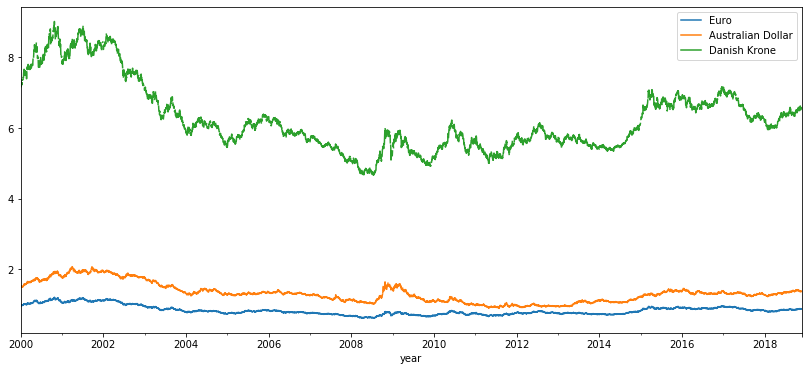

In [6]:
# plot exchange rates
ex_rates.plot(figsize=(14,6))
plt.xlabel('year')


You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [7]:
# correlations

ex_rates.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [ ]:
# your code here


In [8]:
# your code here
xr_diff = ex_rates.diff(periods=1)

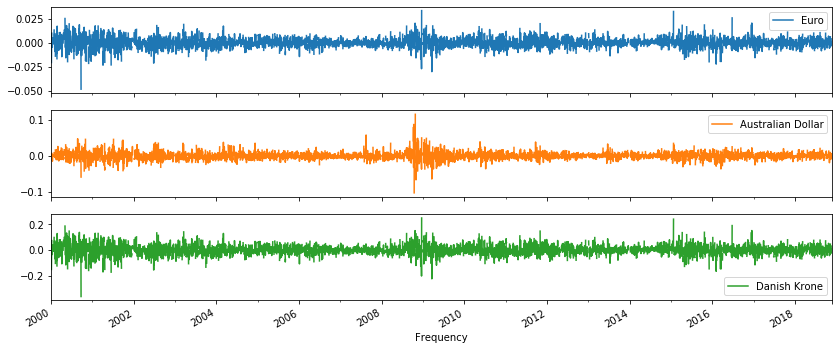

In [10]:
# your code here
xr_diff.plot(figsize=(14,6), subplots=True, legend=True);

### Explain what's going on

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [11]:
# your code here
xr_shift_1 = ex_rates[['Euro']].shift(periods=1)
lag_1 = pd.concat([xr_shift_1, ex_rates.Euro], axis=1)
lag_1.corr()


,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


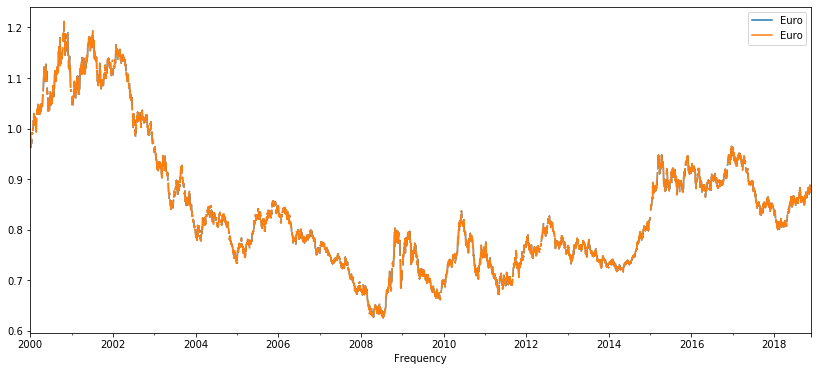

In [13]:
# your code here
lag_1.plot(figsize=(14,6));


In [ ]:
# your code here

Repeat this, but for a "lag 5 autocorrelation"

In [14]:
# lag 50
xr_shift_50 = ex_rates[['Euro']].shift(periods=50)
lag_50 = pd.concat([xr_shift_50, ex_rates.Euro], axis=1)
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


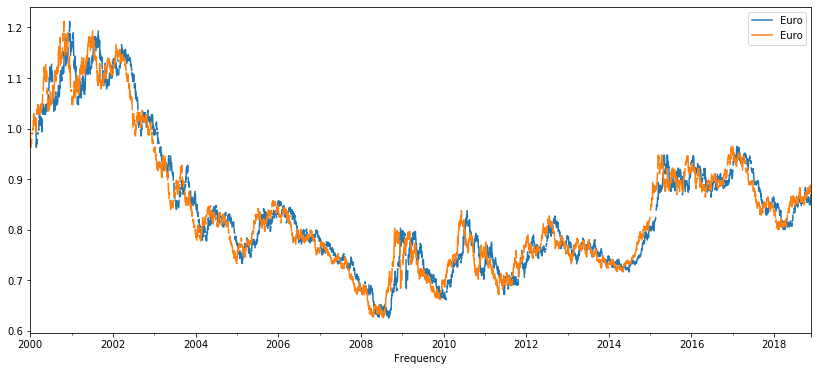

In [15]:
# your code here
lag_50.plot(figsize=(14,6));

### What's your conclusion here?

Knowing this, let's plot the ACF now.

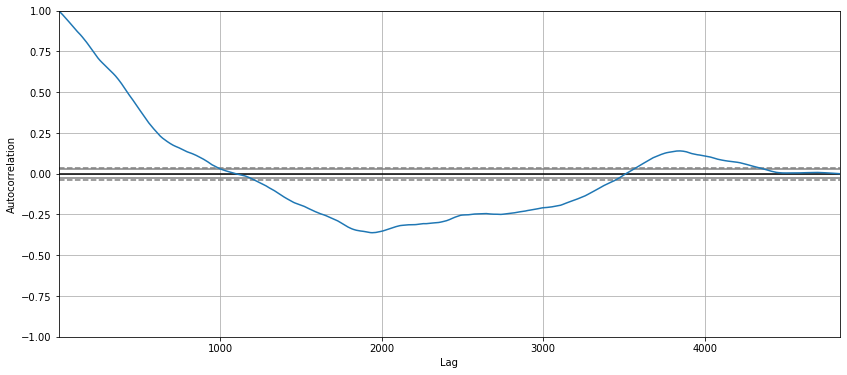

In [16]:
# plot ACF
fig = plt.figure(figsize=(14,6))
pd.plotting.autocorrelation_plot(ex_rates[['Euro']].dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

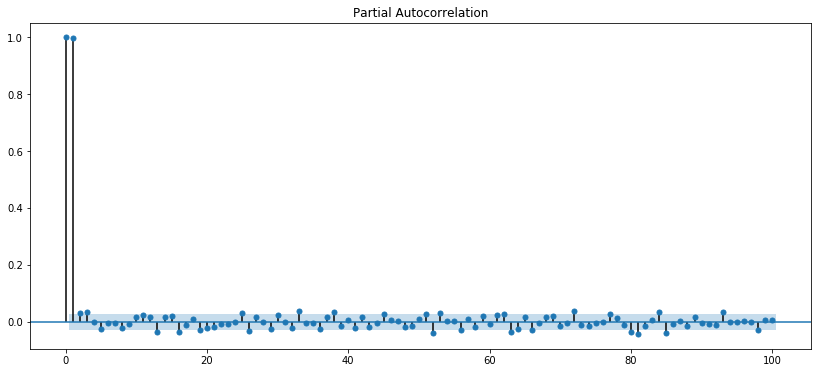

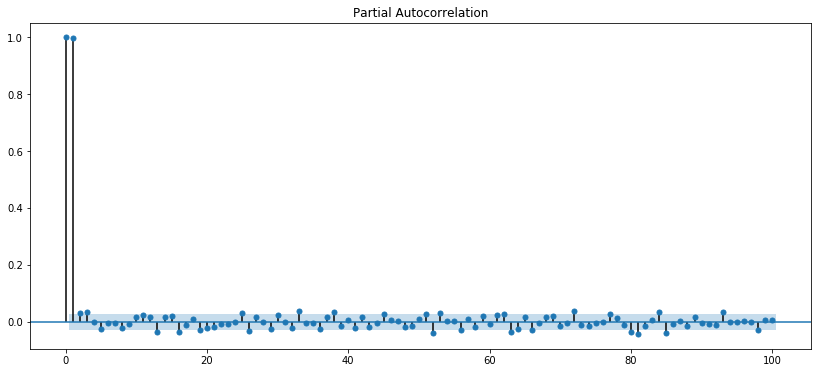

In [17]:
# plot PACF
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 14,6
plot_pacf(ex_rates[['Euro']].dropna(), lags=100)

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [32]:
pas = pd.read_csv('passengers.csv')
pas.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [26]:
# ACF

pas.Month = pd.to_datetime(pas.Month)
pas.set_index('Month', inplace=True)


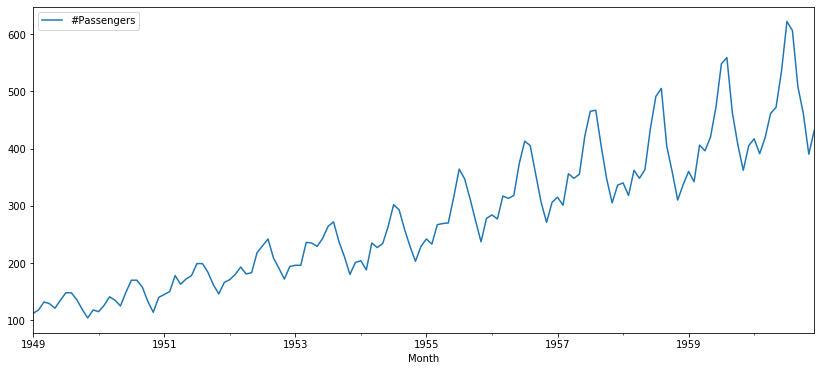

In [28]:
# your code here
pas.plot(figsize=(14,6));

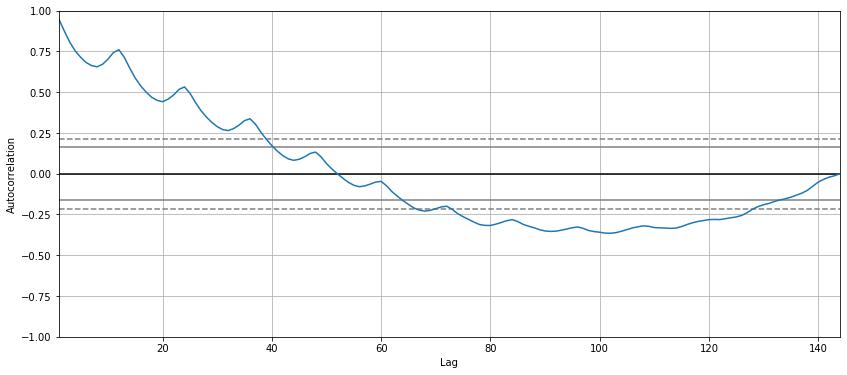

In [29]:
# AFC
fig = plt.figure(figsize=(14,6))
pd.plotting.autocorrelation_plot(pas.dropna());

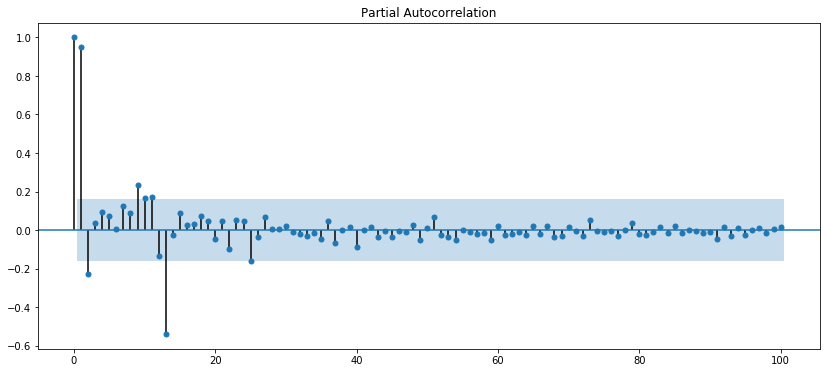

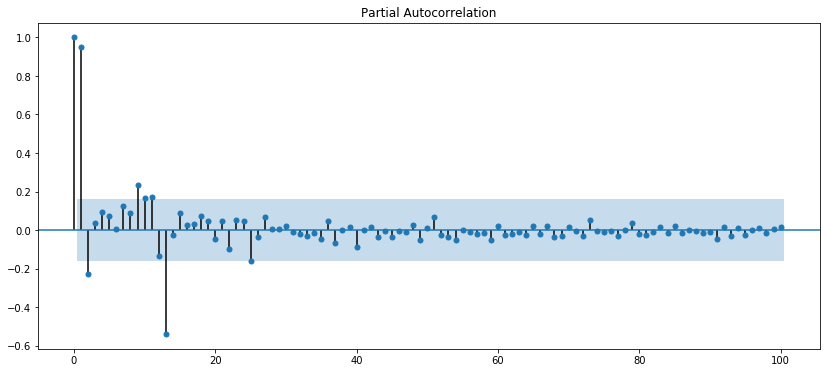

In [31]:
# PAFC
rcParams['figure.figsize'] = 14,6
plot_pacf(pas.dropna(), lags=100, method='ywm')

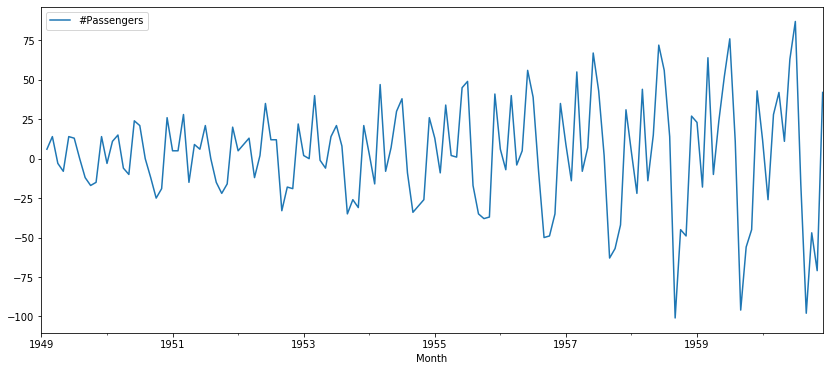

In [34]:
# diff
pas_diff = pas.diff(periods=1)
pas_diff.plot(figsize=(14,6));

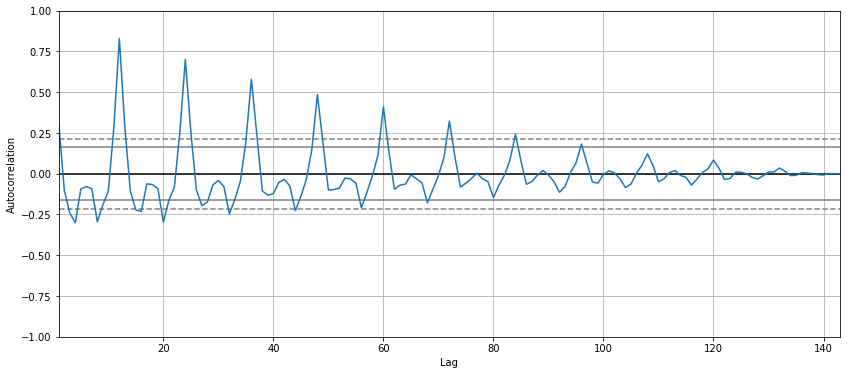

In [35]:
# diff ACF
fig = plt.figure(figsize=(14,6))
pd.plotting.autocorrelation_plot(pas_diff.dropna());

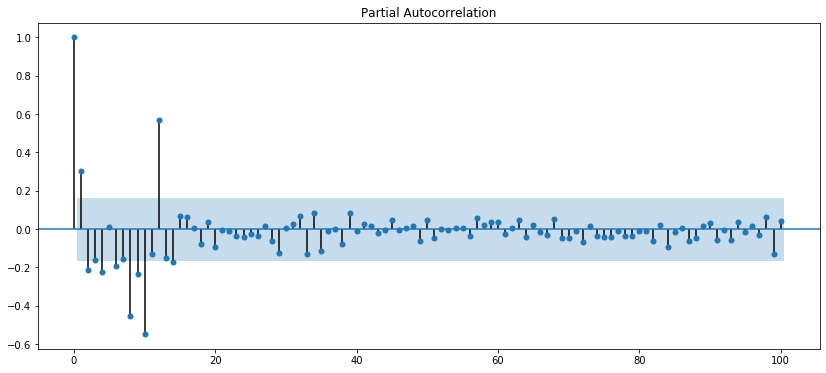

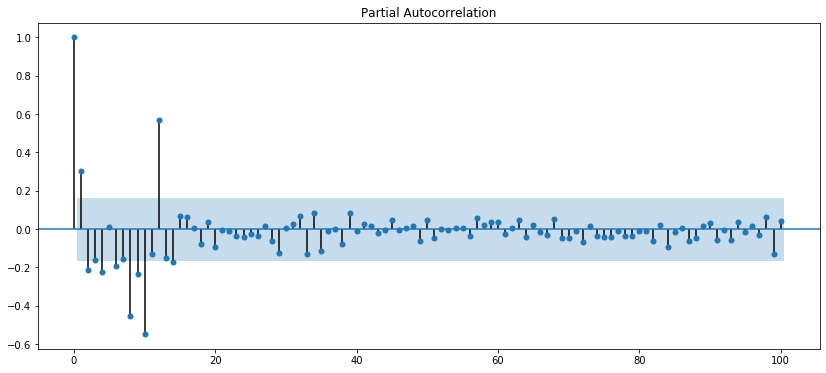

In [36]:
# PAFC diff
rcParams['figure.figsize'] = 14,6
plot_pacf(pas_diff.dropna(), lags=100, method='ywm')

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [41]:
# your code here
nyse = pd.read_csv('NYSE_monthly.csv')
nyse.head(10)

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042
5,1961-06,-0.042
6,1961-07,0.011
7,1961-08,0.021
8,1961-09,-0.030
9,1961-10,0.021


In [42]:
# your code here
nyse.Month = pd.to_datetime(nyse.Month)
nyse.set_index('Month', inplace=True)

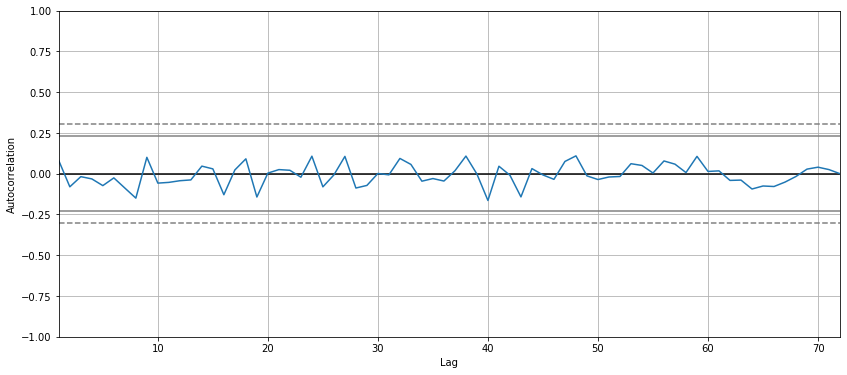

In [44]:
# ACF
fig = plt.figure(figsize=(14,6))
pd.plotting.autocorrelation_plot(nyse.dropna());

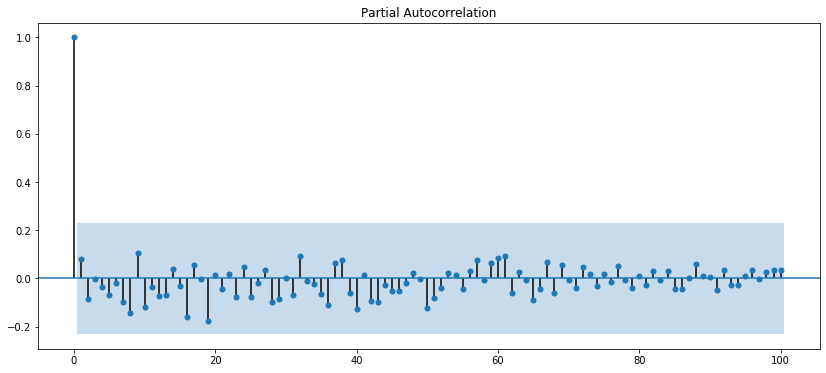

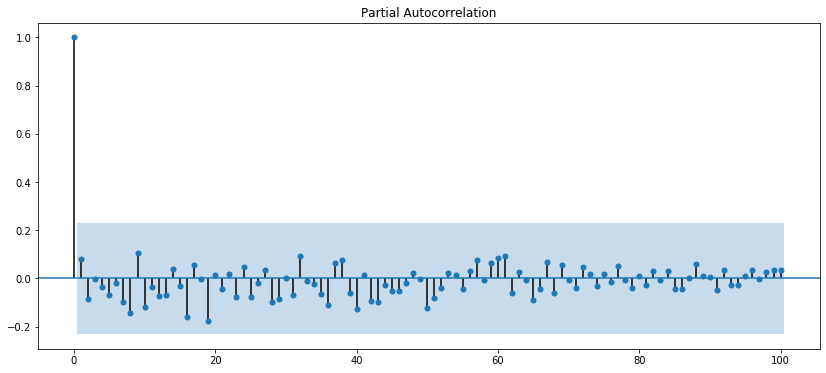

In [45]:
# PAFC 
rcParams['figure.figsize'] = 14,6
plot_pacf(nyse.dropna(), lags=100, method='ywm')

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!